<a href="https://colab.research.google.com/github/hritik7080/Weather-Prediction-Time-Series-Forecasting/blob/master/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set
Given dataset provides the weather data for city Delhi, India. We will try to analyze the weather and predict the temperature field _tempm in the datset with ***Time Series Forecasting***.

In [196]:
import os
os.environ['KAGGLE_USERNAME'] = "ccfdfvapour"
os.environ['KAGGLE_KEY'] = "4b5afcb132d01da14896a17dbdf21856"

In [197]:
!kaggle datasets download -d mahirkukreja/delhi-weather-data

delhi-weather-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [198]:
from zipfile import ZipFile

with ZipFile('delhi-weather-data.zip', 'r') as zipObj:
   zipObj.extractall()

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


# 设置图形风格和字体
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

In [200]:
df = pd.read_csv("testset.csv")
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [201]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [202]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

### Part 1: A quick analysis of Weather in Delhi

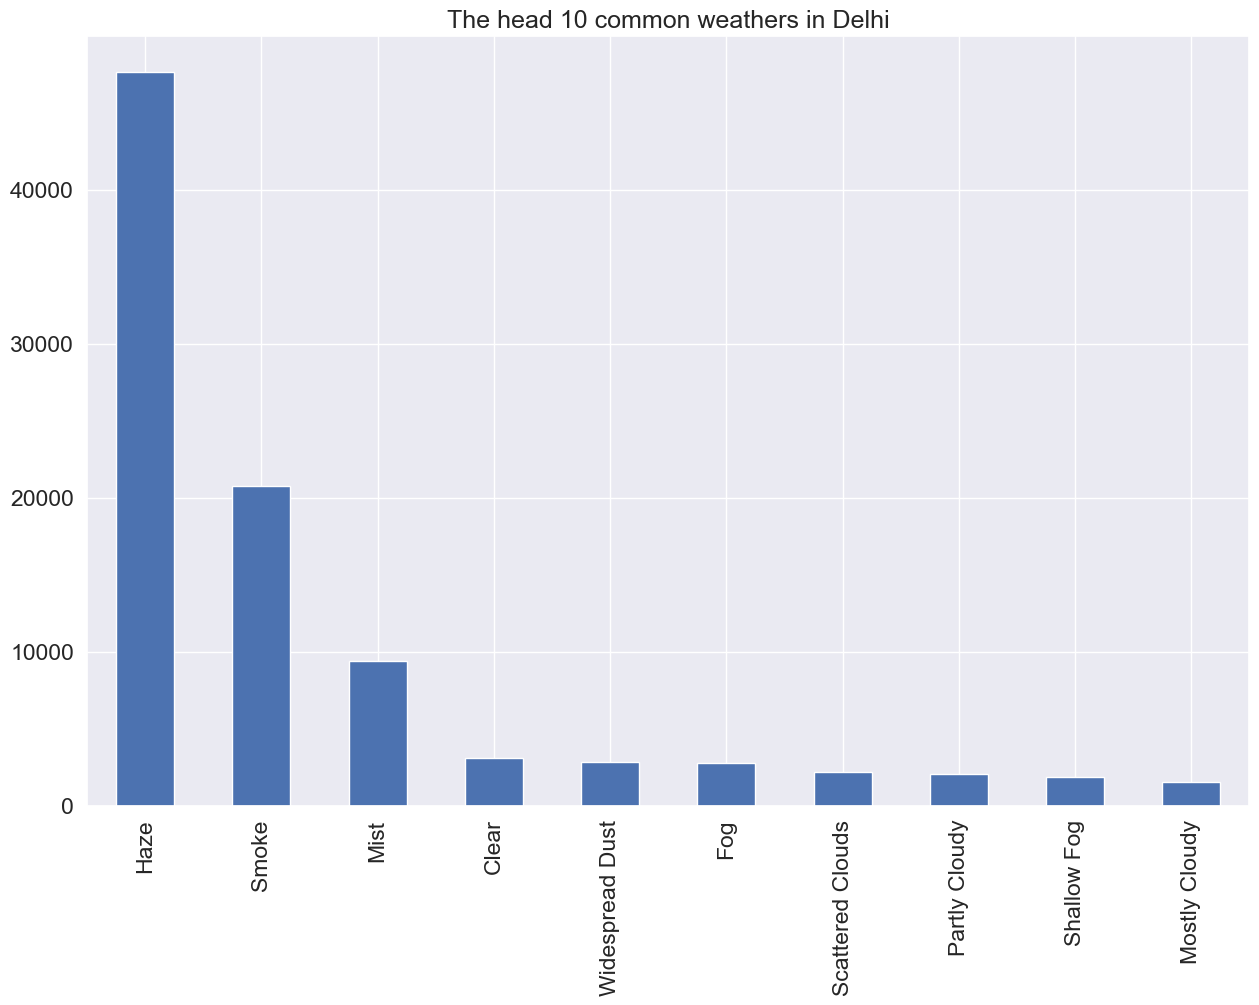

In [203]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(10).plot(kind='bar')

plt.title('The head 10 common weathers in Delhi')
plt.show()

It is clearly visible that Haze and Smoke are most common weatehrs in Delhi

[]

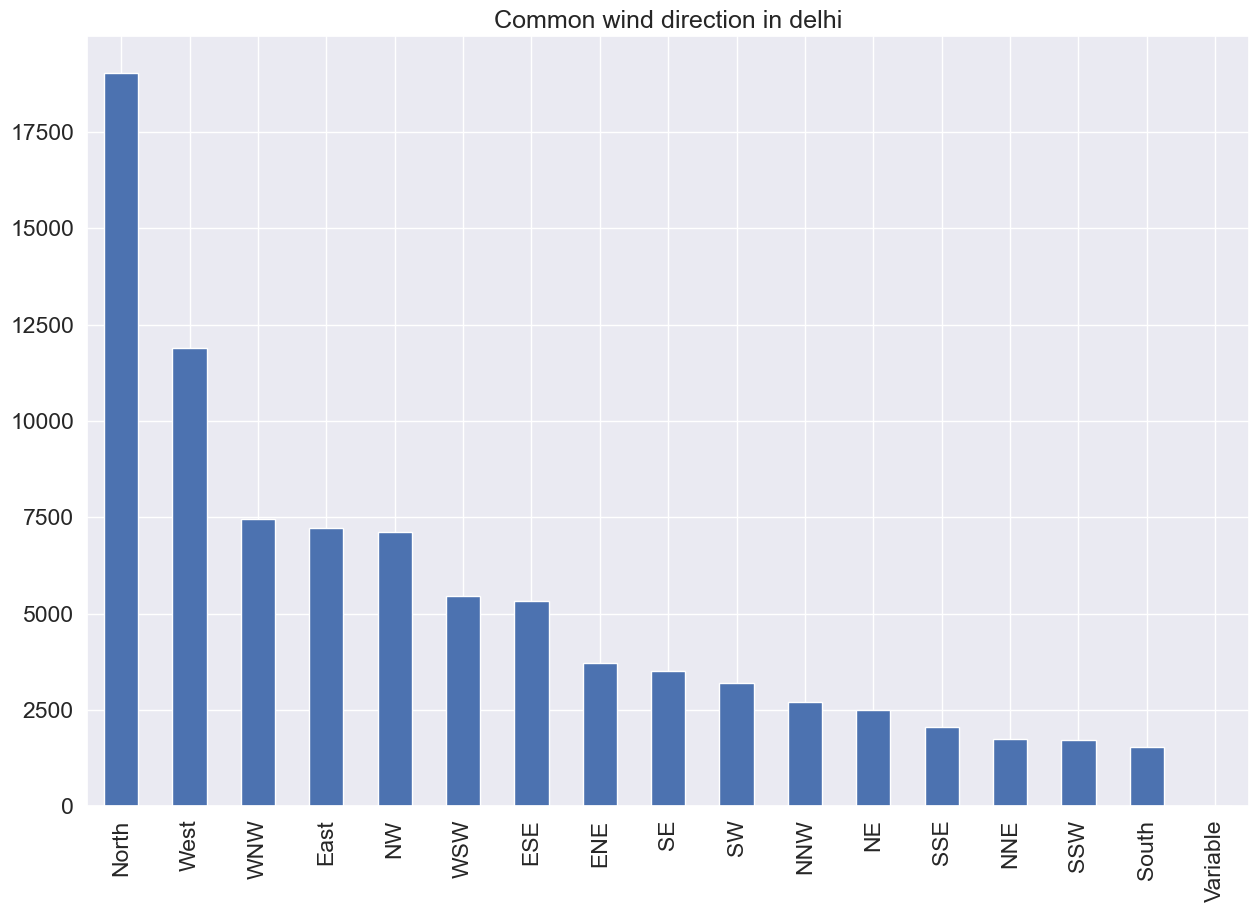

In [204]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

North and West are the most common wind directions in dehi.

C:\Users\VAPOUR\AppData\Local\Temp\ipykernel_23328\1994023906.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)


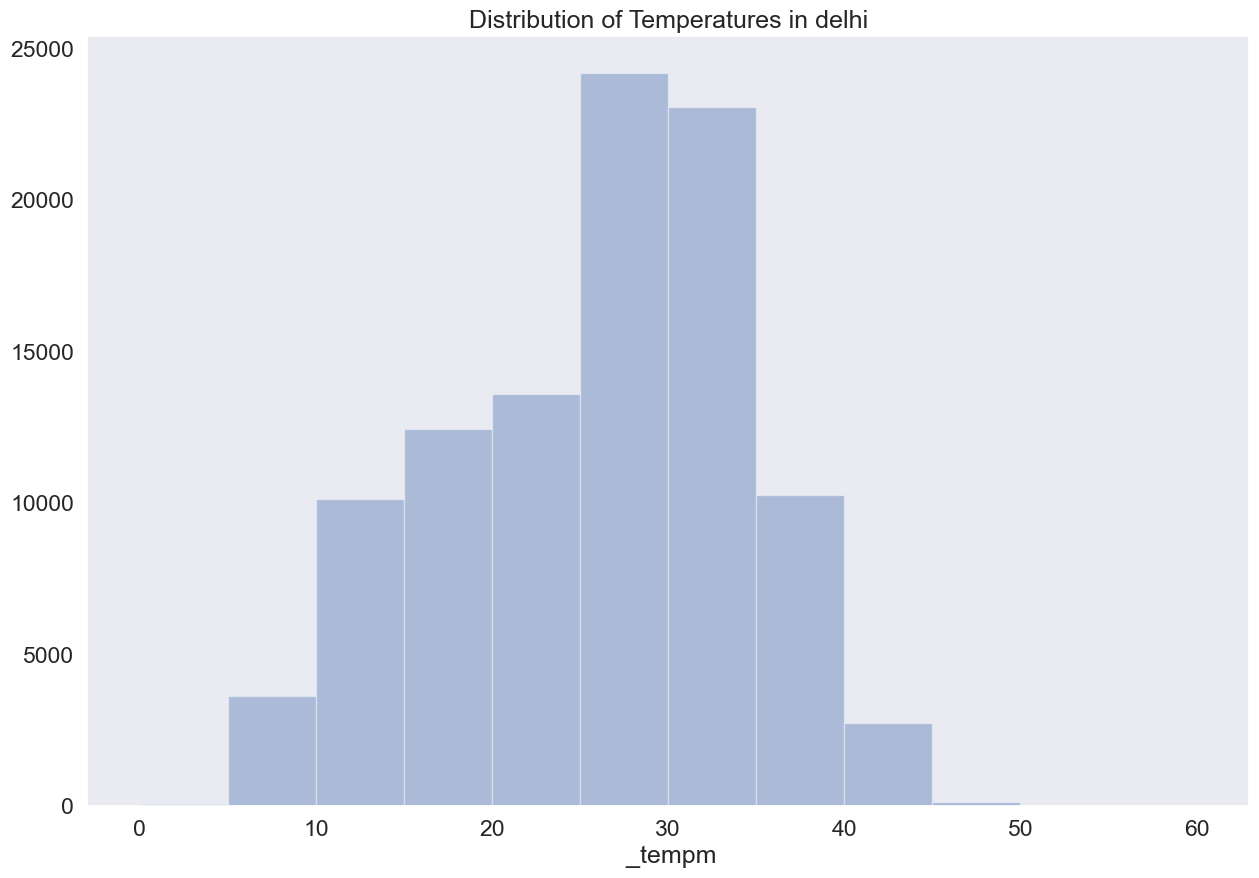

In [205]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures in delhi")
plt.grid()
plt.show()

Most common temperature scale in Delhi is from 25 to 35 degree.

In [206]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [207]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [208]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [209]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [210]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()


0

In [211]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [212]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]

In [213]:
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [214]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [215]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [216]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

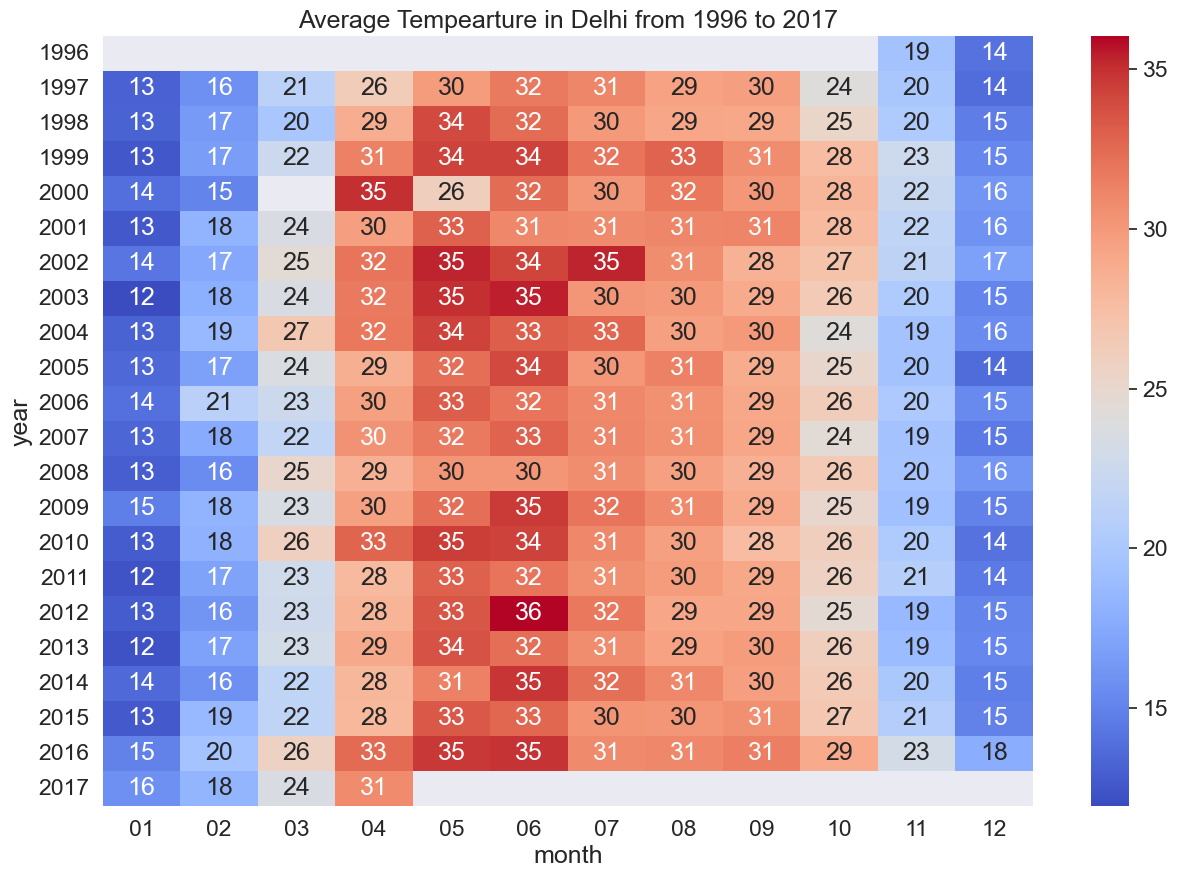

In [217]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [218]:
df[' _hum'].isna().sum()

757

In [219]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [220]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

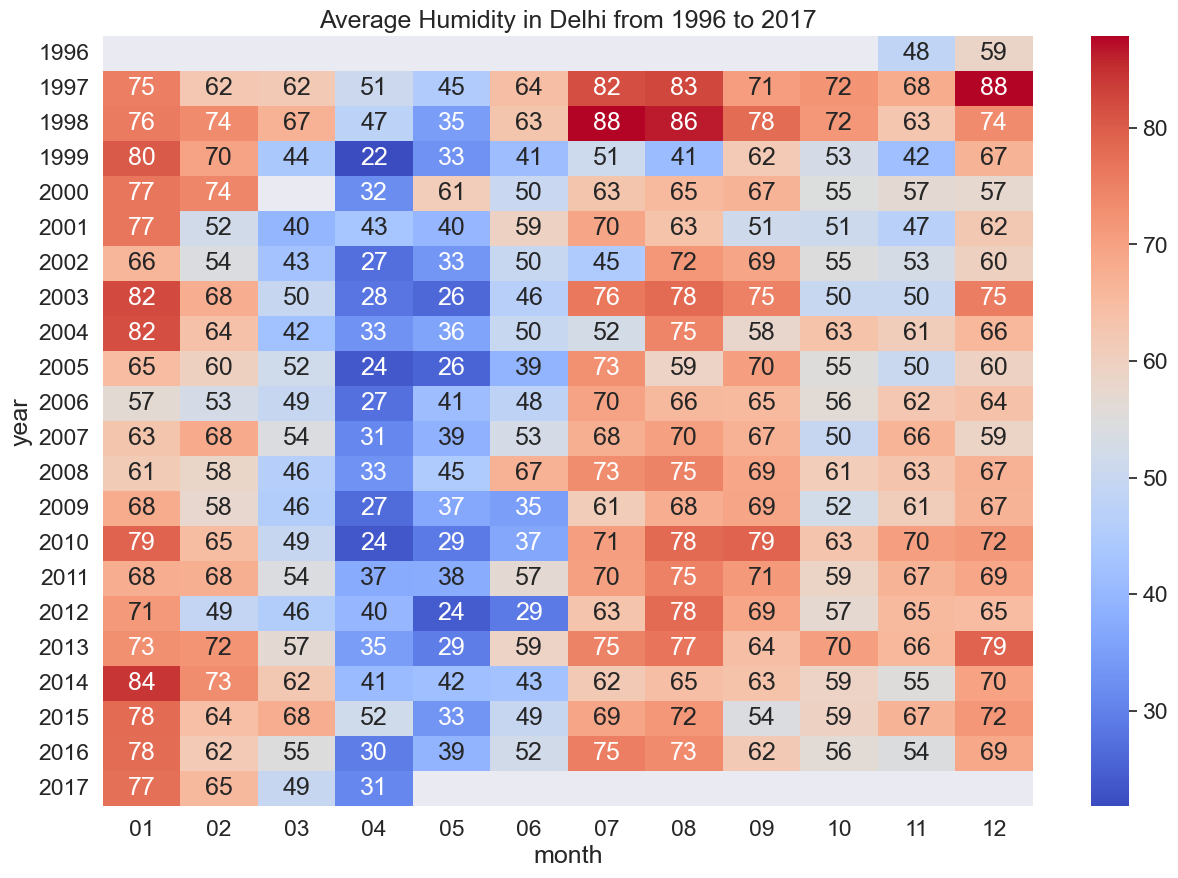

In [221]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()


# Time Series Forecasting

In [222]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [223]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [224]:
data = data.resample('D').mean()

In [225]:
data.temp.isna().sum()

141

In [226]:
data.fillna(data['temp'].mean(), inplace=True)

In [227]:
data.temp.isna().sum()

0

In [228]:
data.shape

(7480, 1)

In [229]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


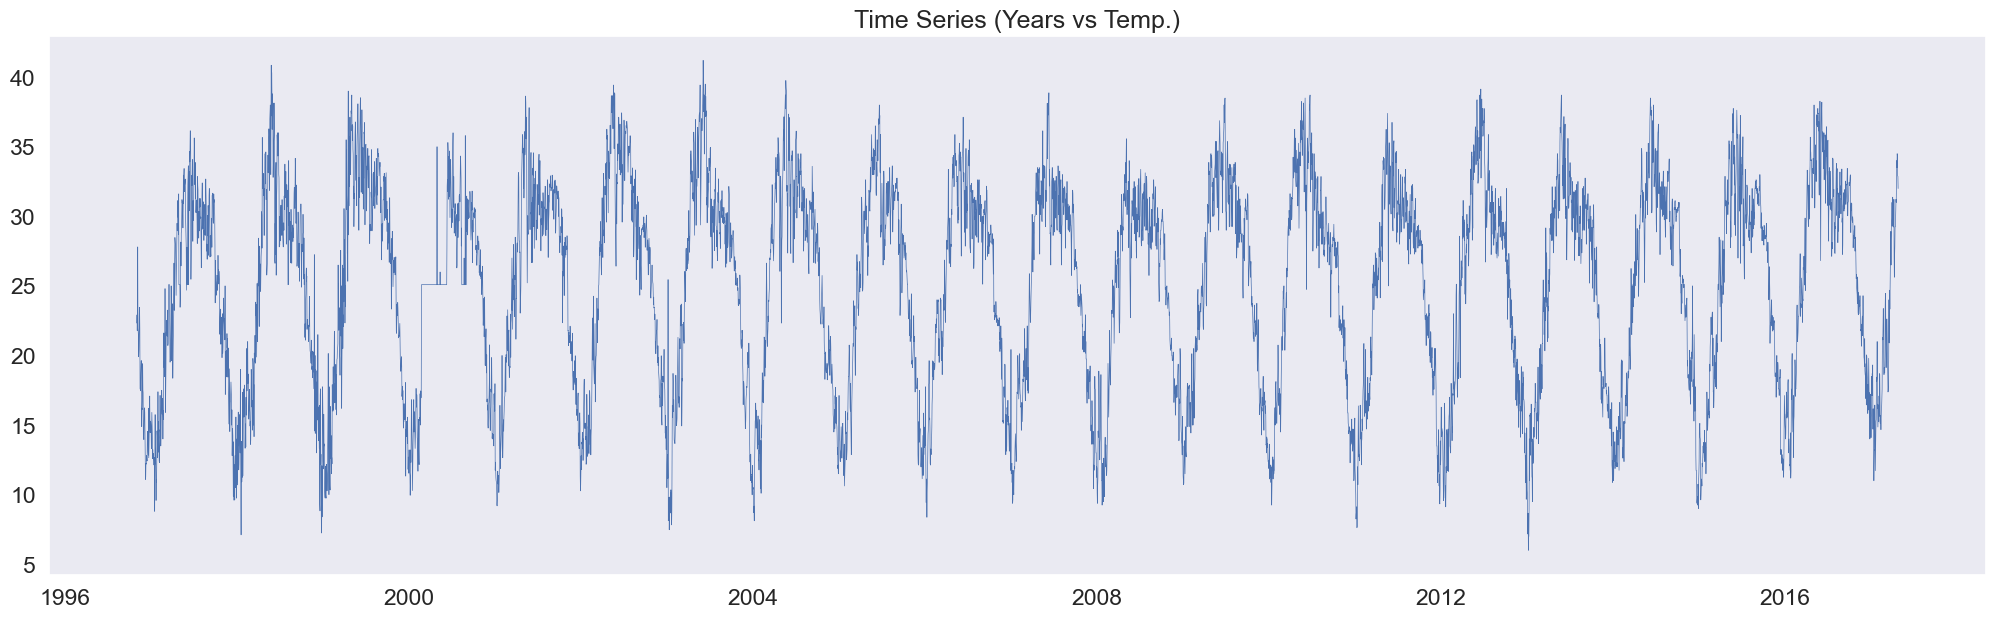

In [230]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [231]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [232]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [233]:
data_scaled.shape

(7480, 1)

In [234]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [235]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [236]:
k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:] 
Ytrain.shape,Ytest.shape

((7300, 1), (150, 1))

In [237]:
X.shape

(7450, 30, 1)

In [238]:
Xtrain.shape

(7300, 30, 1)

In [239]:
Xtest.shape

(150, 30, 1)

In [240]:

from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Embedding, LSTM, Dropout, Activation,RepeatVector,Conv1D,MaxPooling1D,TimeDistributed,Bidirectional,BatchNormalization

In [267]:
model = Sequential()
#原生的
# model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
# model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(RepeatVector(30))
# model.add(LSTM(units=100, return_sequences=True))
# model.add(Dropout(0.2))
# #model.add(LSTM(units=100, return_sequences=True))
# #model.add(LSTM(units=100, return_sequences=True))
# model.add(Bidirectional(LSTM(128)))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(1))

# #自己的
# model.add(LSTM(
#     256,input_shape=(30,1),

#     return_sequences=True))

# model.add(Dropout(0.2))
# model.add(LSTM(
#     256,
#     return_sequences=False))

# model.add(Dropout(0.2))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(1))  # 10个输出的全连接层
# # print(train_future.shape[1])
# model.add(Activation("relu"))

# model.compile(loss='mse', optimizer='adam')
chose_model = 4

if chose_model == 1:
    # 创建LSTM模型1
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(30,1)))
    model.add(Dense(units=1))
elif chose_model == 2:
    # 创建LSTM模型2
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(30,1)))
    model.add(Dense(units=1))
elif chose_model == 3:
    # 创建LSTM模型3
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(30,1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dense(units=1))
elif chose_model == 4:
    # 创建LSTM模型
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(30,1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32))
    model.add(Dense(units=1))
    

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
history=model.fit(Xtrain, Ytrain, epochs=30, batch_size=32)

# 对测试数据进行预测
predictions = model.predict(Xtest)

# 输出预测结果
#print(predictions)

Epoch 1/30
229/229 [==============================] - 7s 15ms/step - loss: 0.0303
Epoch 2/30
229/229 [==============================] - 3s 15ms/step - loss: 0.0201
Epoch 3/30
229/229 [==============================] - 3s 15ms/step - loss: 0.0182
Epoch 4/30
229/229 [==============================] - 3s 15ms/step - loss: 0.0162
Epoch 5/30
229/229 [==============================] - 4s 17ms/step - loss: 0.0142
Epoch 6/30
229/229 [==============================] - 4s 19ms/step - loss: 0.0127
Epoch 7/30
229/229 [==============================] - 4s 16ms/step - loss: 0.0118
Epoch 8/30
229/229 [==============================] - 3s 15ms/step - loss: 0.0110
Epoch 9/30
229/229 [==============================] - 4s 15ms/step - loss: 0.0108
Epoch 10/30
229/229 [==============================] - 4s 16ms/step - loss: 0.0106
Epoch 11/30
229/229 [==============================] - 4s 16ms/step - loss: 0.0105
Epoch 12/30
229/229 [==============================] - 3s 15ms/step - loss: 0.0104
Epoch 13/30
2

In [268]:
model.save("./regressor.hdf5")

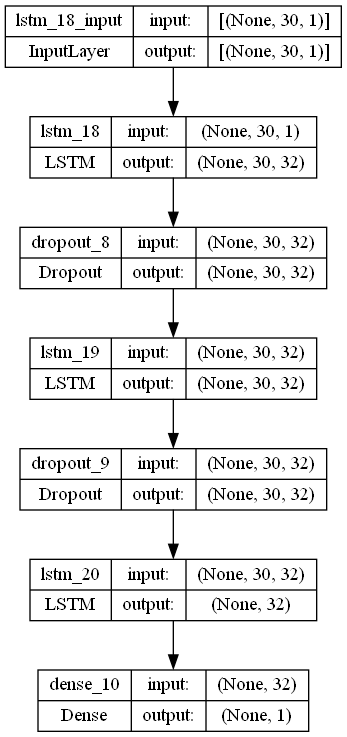

In [269]:
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
import os
os.environ['PATH'] += os.pathsep + r'F:\Graphviz\bin'
plot_model(model, to_file='model'+str(chose_model)+'.png',show_shapes=True)

In [270]:
predict = model.predict(Xtest)

5/5 [==============================] - 0s 5ms/step


In [271]:
predict = scalar.inverse_transform(predict)


In [272]:
Ytesting = scalar.inverse_transform(Ytest)

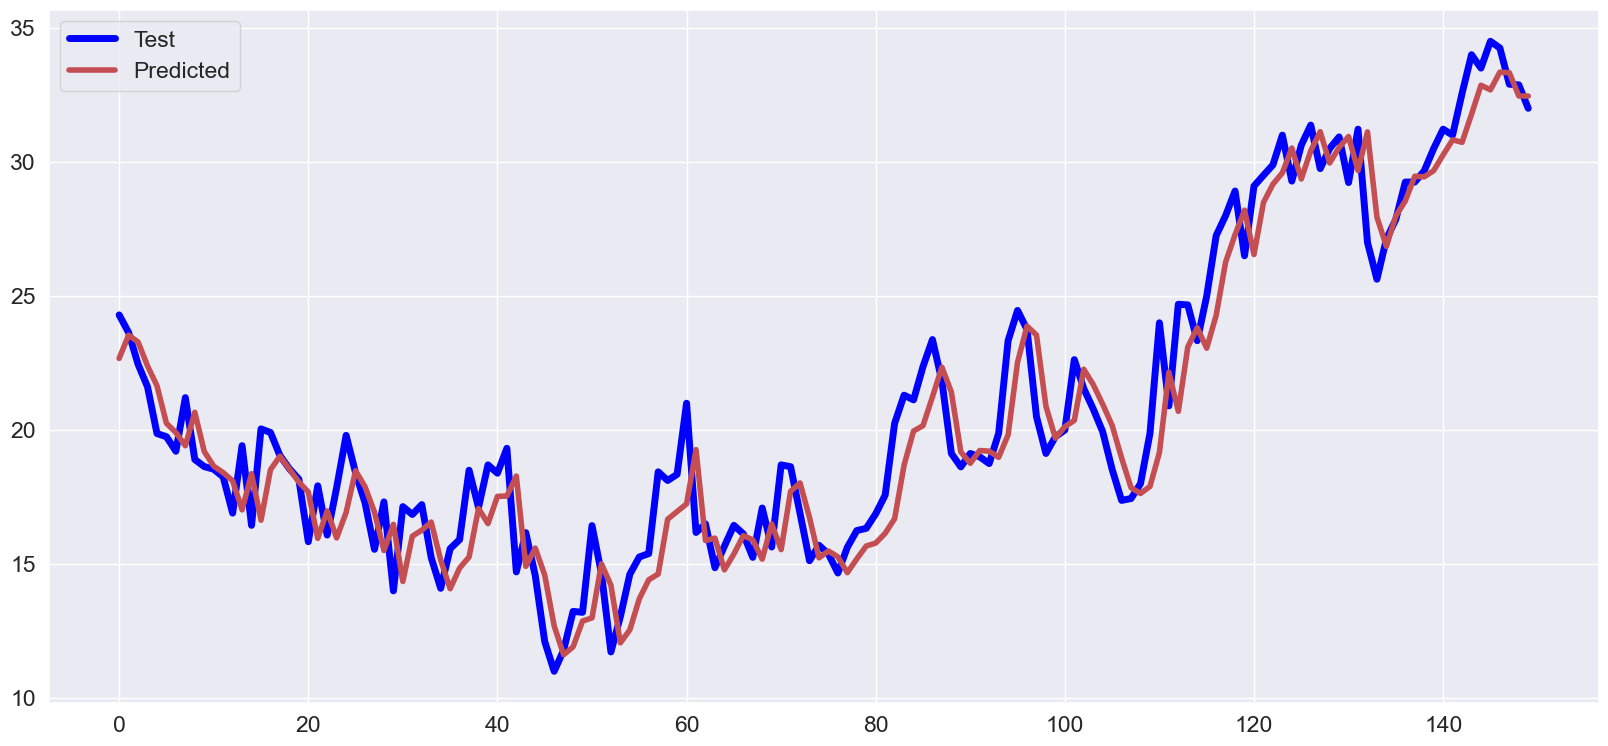

In [273]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.savefig('weatherpredict.png')
plt.show()

In [274]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score,median_absolute_error
print('MSE:'+str(mean_squared_error(Ytesting, predict)))
print('MAE:'+str(mean_absolute_error(Ytesting, predict)))
print('MedAE:'+str(median_absolute_error(Ytesting, predict)))
print('R^2:'+str(r2_score(Ytesting, predict)))
print('explained_variance_score:'+str(explained_variance_score(Ytesting, predict)))

MSE:2.914555532977444
MAE:1.373793688936306
MedAE:1.1499111387464733
R^2:0.9138379785039225
explained_variance_score:0.9190263720398915


In [258]:
模型1:
MSE:2.810160744976071
MAE:1.3381393268991382
MedAE:1.0823443335330438
R^2:0.9169241663861152
explained_variance_score:0.9176370325199312
模型2:
MSE:2.7798536886188567
MAE:1.3373976132307774
MedAE:1.1653690204753726
R^2:0.9178201236639185
explained_variance_score:0.9183525400502957
模型3:
MSE:3.472878547272355
MAE:1.4644608355349085
MedAE:1.3228295644124346
R^2:0.8973324636783776
explained_variance_score:0.9075516300729203
模型4:
MSE:2.914555532977444
MAE:1.373793688936306
MedAE:1.1499111387464733
R^2:0.9138379785039225
explained_variance_score:0.9190263720398915


SyntaxError: invalid syntax (3510493117.py, line 1)